In [1]:
import logging

import graphcat.notebook

logging.basicConfig(level=logging.DEBUG)

INFO:graphcat.common:Task baz updating.
INFO:graphcat.common:Task baz executing. Inputs: {None}
INFO:graphcat.common:Task bar updating.
INFO:graphcat.common:Task bar executing. Inputs: {None}
INFO:graphcat.common:Task foo updating.
INFO:graphcat.common:Task foo executing. Inputs: {None}
INFO:graphcat.common:Task baz cycle detected.
INFO:graphcat.common:Task foo finished. Output: None
INFO:graphcat.common:Task bar finished. Output: None
INFO:graphcat.common:Task baz finished. Output: None


Output: None


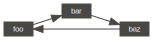

In [2]:
graph = graphcat.DynamicGraph()
logger = graphcat.Logger(graph)

graph.set_task("foo", graphcat.consume)
graph.set_task("bar", graphcat.consume)
graph.set_task("baz", graphcat.consume)

graph.set_links("foo", "bar")
graph.set_links("bar", "baz")
graph.set_links("baz", "foo")

print("Output:", graph.output("baz"))
graphcat.notebook.display(graph)

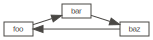

INFO:graphcat.common:Task foo updating.
INFO:graphcat.common:Task foo executing. Inputs: {None}
INFO:graphcat.common:Task baz updating.
INFO:graphcat.common:Task baz executing. Inputs: {None}
INFO:graphcat.common:Task bar updating.
INFO:graphcat.common:Task bar executing. Inputs: {None}
INFO:graphcat.common:Task foo cycle detected.
INFO:graphcat.common:Task bar finished. Output: None
INFO:graphcat.common:Task baz finished. Output: None
INFO:graphcat.common:Task foo finished. Output: None


Output: None


In [3]:
graph.mark_unfinished("foo")
graphcat.notebook.display(graph)
print("Output:", graph.output("foo"))